In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

%matplotlib inline

df = pd.read_csv('ManyRatings_Dataset_Cleaned.csv') # Read csv

# Attributes View

In [2]:
pd.options.display.max_columns = df.shape[1] # Full view of df
df.describe(include='all')

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
count,1354,1354.000000,1354.000000,1354.000000,1.354000e+03,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1.354000e+03,1.354000e+03,1.354000e+03,1354,1354.000000,1354.000000
unique,1348,NaN,NaN,NaN,NaN,9,13,20,19,592,1096,924,504,781,949,1354,NaN,NaN,NaN,1184,NaN,NaN
top,Total Recall,NaN,NaN,NaN,NaN,PG-13,Action,Adventure,,Steven Spielberg,Quentin Tarantino,,Johnny Depp,Samuel L. Jackson,Morgan Freeman,pig|the simpsons|lake|dome|adult animation,NaN,NaN,NaN,Paramount Pictures,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,523,523,328,352,18,7,289,27,9,10,1,NaN,NaN,NaN,13,NaN,NaN
mean,NaN,2004.415066,6.966100,60.781388,2.827752e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.645535e+07,1.075557e+08,2.554950e+08,NaN,116.516248,6.605613
std,NaN,8.219851,0.784454,15.896219,2.528553e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.690060e+07,9.835862e+07,2.740067e+08,NaN,20.268708,3.477453
min,NaN,1990.000000,3.600000,11.000000,2.088400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+06,3.047100e+04,3.047100e+04,NaN,76.000000,1.000000
25%,NaN,1998.000000,6.500000,49.000000,1.310452e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+07,4.319168e+07,7.897125e+07,NaN,102.000000,3.000000
50%,NaN,2004.000000,7.000000,61.000000,2.117200e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+07,7.620477e+07,1.716738e+08,NaN,114.000000,7.000000
75%,NaN,2012.000000,7.500000,72.000000,3.434645e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.150000e+07,1.387502e+08,3.218525e+08,NaN,129.000000,10.000000


In [3]:
df.head()

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
0,Goodfellas,1990,8.7,90.0,983254,16,Biography,Crime,Drama,Martin Scorsese,Nicholas Pileggi(book),Nicholas Pileggi(screenplay),Robert De Niro,Ray Liotta,Joe Pesci,gangster|organized crime|sadistic psychopath|m...,25000000.0,46836214.0,46879633.0,Warner Bros.,146,9
1,Home Alone,1990,7.6,63.0,448940,Not Rated,Comedy,Family,,Chris Columbus,John Hughes,,Macaulay Culkin,Joe Pesci,Daniel Stern,christmas|home alone|burglary|child protagonis...,18000000.0,285761243.0,477063114.0,"Hughes Entertainment,Twentieth Century Fox",103,3
2,Edward Scissorhands,1990,7.9,74.0,435025,PG,Drama,Fantasy,Romance,Tim Burton,Tim Burton(story),Caroline Thompson(story),Johnny Depp,Winona Ryder,Dianne Wiest,scissors|compassion|surrealism|waterbed|love,20000000.0,56362352.0,86024005.0,Twentieth Century Fox,105,12
3,Back to the Future Part III,1990,7.4,55.0,389988,Not Rated,Adventure,Comedy,Sci-Fi,Robert Zemeckis,Robert Zemeckis(characters),Bob Gale(characters),Michael J. Fox,Christopher Lloyd,Mary Steenburgen,year 1955|year 1885|woman|purple dress|girl ne...,40000000.0,88277583.0,249130916.0,"Universal Pictures,Amblin Entertainment,U-Driv...",118,7
4,The Godfather: Part III,1990,7.6,60.0,347836,PG,Crime,Drama,,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,opera|vatican|italy|gangster|catholic church,54000000.0,66666062.0,136766062.0,"Paramount Pictures,Zoetrope Studios",162,12


In [4]:
df.isnull().sum()

Movie_name             0
Release_Year           0
IMDB_Rating            0
Metascore              0
Reviewer_count         0
Censor_Board_Rating    0
Genre_1                0
Genre_2                0
Genre_3                0
Director               0
Writer_1               0
Writer_2               0
Star_1                 0
Star_2                 0
Star_3                 0
Plot_Keywords          0
Budget                 0
Gross_USA              0
Cum_Worldwide_Gross    0
Production_Company     0
Length_in_minutes      0
Release_Month          0
dtype: int64

# Data Preperation

In [5]:
label_quality = LabelEncoder()

In [6]:
label_quality.fit(df[['Genre_1', 'Genre_2','Production_Company','Director','Writer_1','Star_1','Star_2','Censor_Board_Rating']].stack().unique())
df['Genre_1'] = label_quality.transform(df['Genre_1'])
df['Genre_2'] = label_quality.transform(df['Genre_2'])
df['Production_Company'] = label_quality.transform(df['Production_Company'])
df['Director'] = label_quality.transform(df['Director'])
df['Writer_1'] = label_quality.transform(df['Writer_1'])
df['Star_1'] = label_quality.transform(df['Star_1'])
df['Star_2'] = label_quality.transform(df['Star_2'])
df['Censor_Board_Rating'] = label_quality.transform(df['Censor_Board_Rating'])

df.sample(5)

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
491,Pearl Harbor,2001,6.2,44.0,305593,2466,30,935,History,2200,2710,,263,1843,Josh Hartnett,historically inaccurate|sex|bare chested male|...,140000000.0,198542554.0,449220945.0,3257,183,6
859,Revolutionary Road,2008,7.3,69.0,190127,2696,935,2841,,2903,1823,Richard Yates(novel),1975,1847,Christopher Fitzgerald,unhappy love|abortion|beach|shower|bare cheste...,35000000.0,22911480.0,75981180.0,945,119,1
334,The Postman,1997,6.1,29.0,67324,2696,30,42,Drama,1882,796,Eric Roth(screenplay),1882,3689,Larenz Tate,year 2043|year 2013|woman|worst picture razzie...,80000000.0,17626234.0,17626234.0,3185,177,12
161,RoboCop 3,1993,4.1,40.0,44812,2466,30,707,Sci-Fi,1182,1010,Michael Miner(characters),2807,2329,Mario Machado,robocop|christmas|robocop character|broadcast ...,22000000.0,10696210.0,10696210.0,2455,104,11
158,Coneheads,1993,5.3,49.0,49351,2465,685,2923,,3049,3213,Dan Aykroyd,730,1509,Robert Knott,one word title|spock character|interspecies ro...,33000000.0,21274717.0,21274717.0,2472,88,7


In [7]:
df.columns

Index(['Movie_name', 'Release_Year', 'IMDB_Rating', 'Metascore',
       'Reviewer_count', 'Censor_Board_Rating', 'Genre_1', 'Genre_2',
       'Genre_3', 'Director', 'Writer_1', 'Writer_2', 'Star_1', 'Star_2',
       'Star_3', 'Plot_Keywords', 'Budget', 'Gross_USA', 'Cum_Worldwide_Gross',
       'Production_Company', 'Length_in_minutes', 'Release_Month'],
      dtype='object')

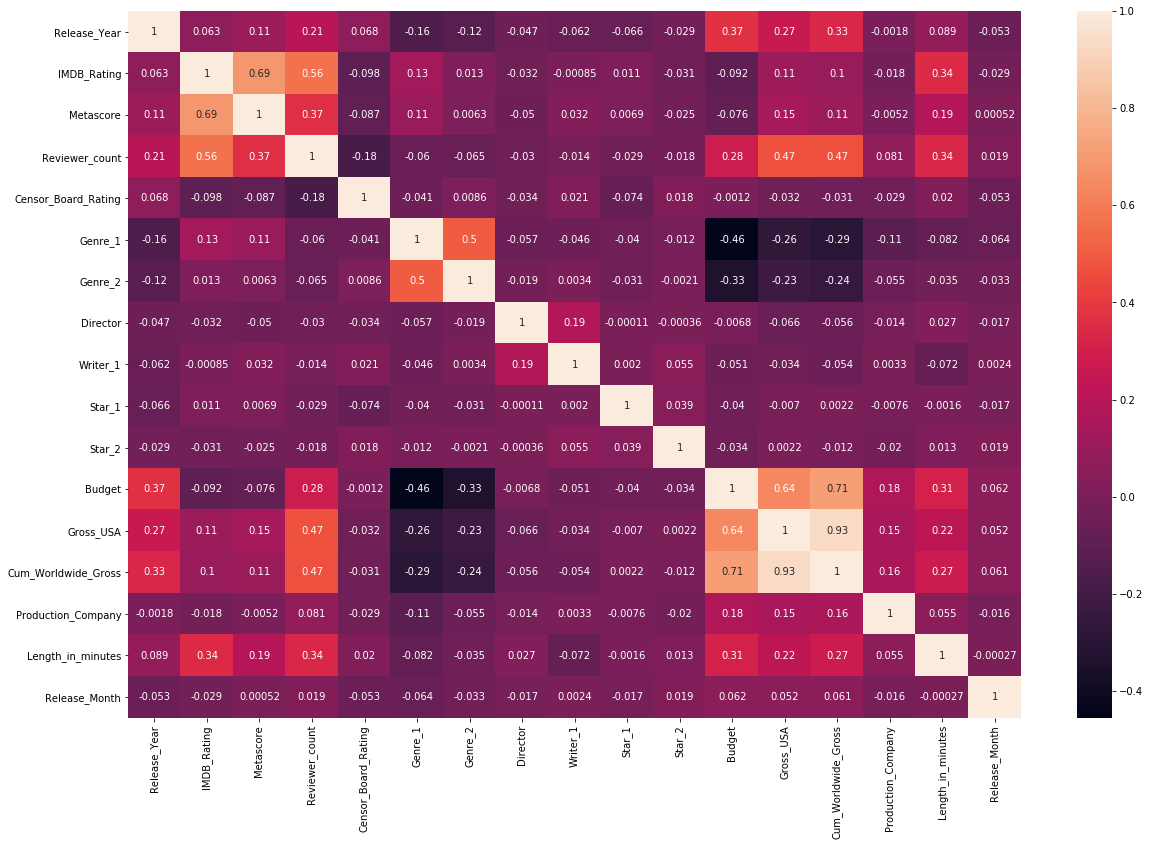

In [8]:
plt.subplots(figsize=(20,13))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
X = df[['Budget', 'Reviewer_count', 'Release_Year', 'Genre_1', 'Length_in_minutes']]
y = df['Cum_Worldwide_Gross']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 99)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [21]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
pred_lm = lm_model.predict(X_test)

In [22]:
print("The r-squared score for model was {} on {} values.".format(r2_score(y_test, pred_lm), len(y_test)))

The r-squared score for model was 0.7326660094484823 on 271 values.
The MSE score for model was 2.0241808674079876e+16 on 271 values.


In [23]:
# For random_state search
for i in range(100):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)
    pred_lm = lm_model.predict(X_test)
    print("The r-squared {} on {} values.".format(r2_score(y_test, pred_lm), len(y_test)))

0
The r-squared 0.6458365414135816 on 271 values.
The MSE score 2.4988179721815788e+16 on 271 values.
1
The r-squared 0.5897474643258991 on 271 values.
The MSE score 3.0471900025836836e+16 on 271 values.
2
The r-squared 0.6204773896157001 on 271 values.
The MSE score 2.570142828405506e+16 on 271 values.
3
The r-squared 0.5831166681293081 on 271 values.
The MSE score 3.3480584287173644e+16 on 271 values.
4
The r-squared 0.6038146895375414 on 271 values.
The MSE score 2.7144885996130816e+16 on 271 values.
5
The r-squared 0.4761558125162586 on 271 values.
The MSE score 5.105475388066173e+16 on 271 values.
6
The r-squared 0.5179869837773177 on 271 values.
The MSE score 4.250183712959255e+16 on 271 values.
7
The r-squared 0.5953726977018728 on 271 values.
The MSE score 3.881229425464864e+16 on 271 values.
8
The r-squared 0.6005333513521356 on 271 values.
The MSE score 3.801513725162178e+16 on 271 values.
9
The r-squared 0.582773000932946 on 271 values.
The MSE score 2.5116800995432908e+16 o